<a href="https://colab.research.google.com/github/Qisam0322/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Sam Qi

## Project Overview

## Load and Inspect Data

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
fname='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
import pandas as pd
df=pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [99]:
#1) How many rows and columns?
# There are 8523 rows and 12 columns.

#2)What are the datatypes of each variable?
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [100]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated()
df.duplicated().sum()

0

In [101]:
#4)Identify missing values.
null_sum=df.isna().sum()
null_percentage=null_sum/len(df)*100
null_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [102]:
null_percentage[null_percentage>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [103]:
#5)Address the missing values by using a placeholder value.
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [104]:
#check statistic of 'Item_Weight' since there is 17% of null in 'Item_Weight'
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [105]:
#choose to use .median as a placeholder because after replacing null with .median
# The mean and std did not change much and Min, Max, and median stayed the same.
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [106]:
# Check for Null after filling null with 'median'
df['Item_Weight'].isna().sum()

0

In [107]:
# Inspecting column 'Outlet_Size'.
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [108]:
# categorical column, decided to use work 'MISSING' as a placeholder to fill Null.
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts()


Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [109]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [110]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [111]:
string_cols=df.select_dtypes('object').columns
for col in string_cols:
  print(f'Value count for {col}')
  print(df[col].value_counts())
  print('\n')


Value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [112]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [113]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [114]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
num_cols=df.select_dtypes('number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [115]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [116]:
name_dic={'Item_Identifier':'ProductID', 'Item_Weight':'Weight of product',
          'Item_Fat_Content':'low fat or regular','Item_Type':'category',
          'Item_MRP':'Max Retail Price', 'Outlet_Identifier':'StoreID',
          'Item_Outlet_Sales':'Product store sales','Outlet_Establishment_Year':'Year store established',
          'Outlet_Size':'Size of the store','Outlet_Location_Type':'Outlet Location Type','Outlet_Type':'Outlet Type','Item_Visibility':'The % of total display area'}

In [117]:
df=df.rename(name_dic,axis=1)
df

,ProductID,Weight of product,low fat or regular,The % of total display area,category,Max Retail Price,StoreID,Year store established,Size of the store,Outlet Location Type,Outlet Type,Product store sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [118]:
df.nunique()

ProductID                      1559
Weight of product               415
low fat or regular                2
The % of total display area    7880
category                         16
Max Retail Price               5938
StoreID                          10
Year store established            9
Size of the store                 4
Outlet Location Type              3
Outlet Type                       4
Product store sales            3493
dtype: int64

## Exploratory Data Analysis

In [119]:
#import liberaries and packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

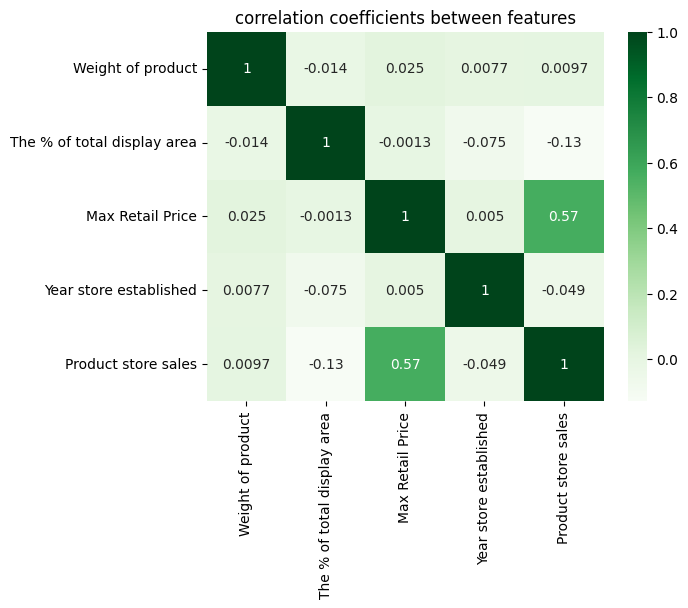

In [120]:
#1)Heatmap to view the correlation between features.
##From the graph, only Product store sales and Max retail price seems to have a positive
##correlation of 0.57.
corr=df.corr(numeric_only=True)
ax=sns.heatmap(corr,annot=True,cmap='Greens')
ax.set_title('correlation coefficients between features');

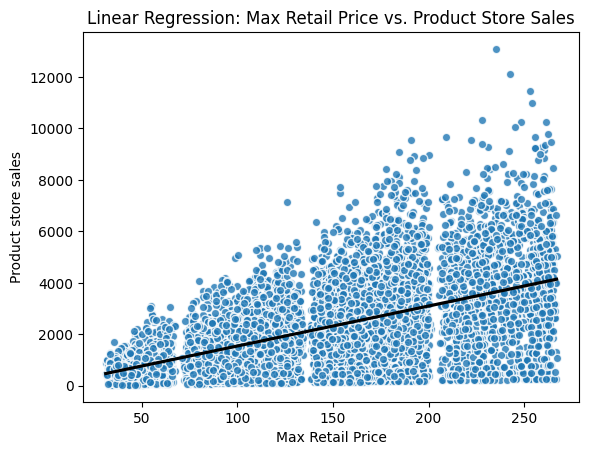

In [121]:
#From the regplot, there is a positive correlation pattern between
#Max Retail price and Product store sales. The correlation is moderate;
#There is no noticable correlation (>0.3 or <-0.3) other than the two features
#mentioned above.
line_kws=dict(color='black')
scatter_kws=dict(edgecolor='white')
ax=sns.regplot(data=df,x='Max Retail Price',y='Product store sales',line_kws=line_kws,scatter_kws=scatter_kws)
ax.set_title('Linear Regression: Max Retail Price vs. Product Store Sales');

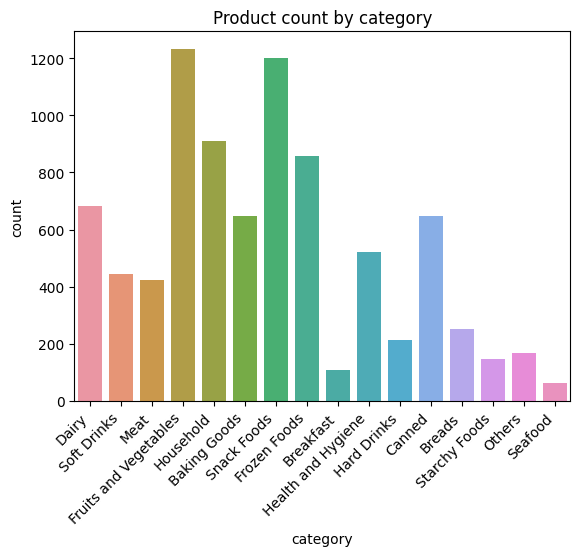

In [122]:
#2)Countplots to view the frequency of each class of categorial features in your dataset.
##The countplot below shows the product counts for each category. 'Fruit and vegetable' and
##'snake foods' have the highest counts of product and 'seafood' has the lowest count of product.
ax=sns.countplot(data=df,x='category')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Product count by category');

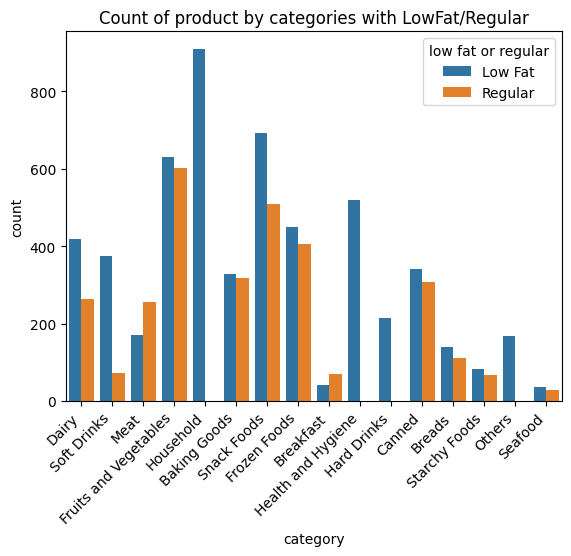

In [123]:
# The countplot below give me some insights on product count of each category
# seperated by LowFat/Regular. In general the company has more low fat product
#(product count not types of product )in stores than regular product but for 'meat' and
#'breakfast' categories the company has more regular product than low fat product.
ax=sns.countplot(data=df,x='category',hue='low fat or regular')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Count of product by categories with LowFat/Regular');

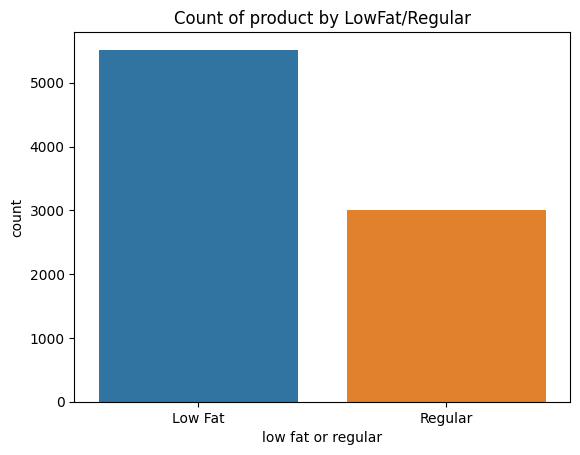

In [124]:
#This countplot shows low fat products has higher product count than
#regular product.
ax=sns.countplot(data=df,x='low fat or regular')
ax.set_title('Count of product by LowFat/Regular');

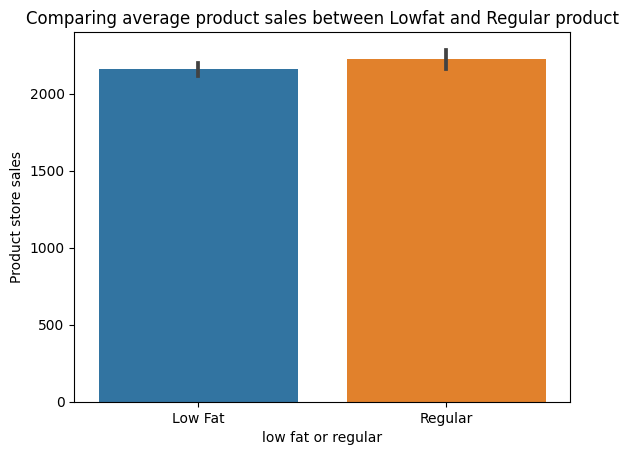

In [125]:
#This barplot shows the average product store sales is higher for regular
#products than low fat products.
ax=sns.barplot(data=df,x='low fat or regular',y='Product store sales')
ax.set_title('Comparing average product sales between Lowfat and Regular product');

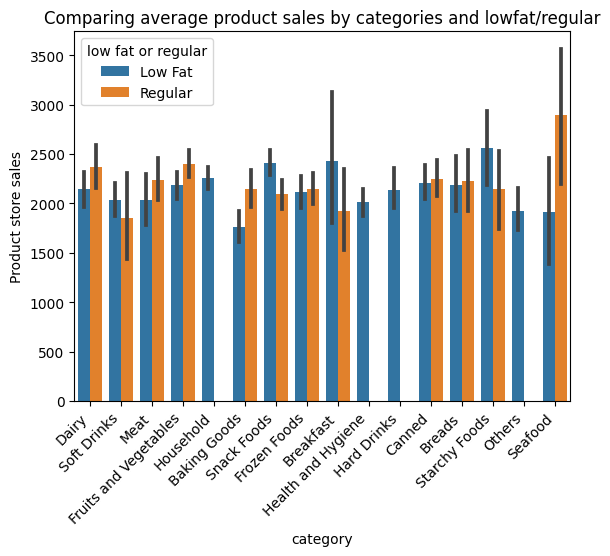

In [126]:
#Upon further investigation, regular product has a higher average
#product store sales in some categories. Regular seafood products have
#the highest average product store sales.
ax=sns.barplot(data=df,x='category',y='Product store sales',hue='low fat or regular')
ax.set_title('Comparing average product sales by categories and lowfat/regular')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');

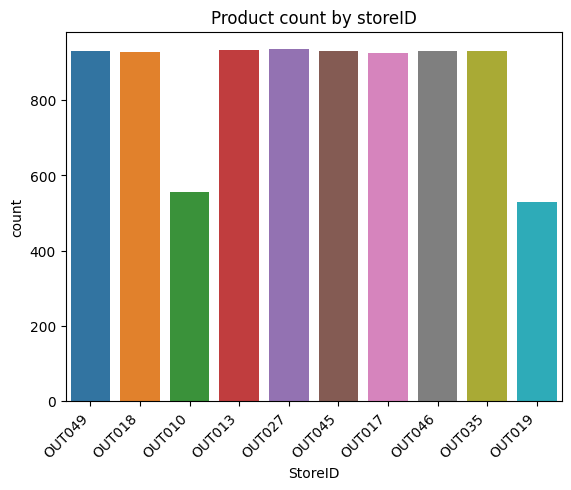

In [127]:
#Most the stores has similar amount of products except for storeID OUT010 and
#OUT019.
ax=sns.countplot(data=df,x='StoreID')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Product count by storeID');

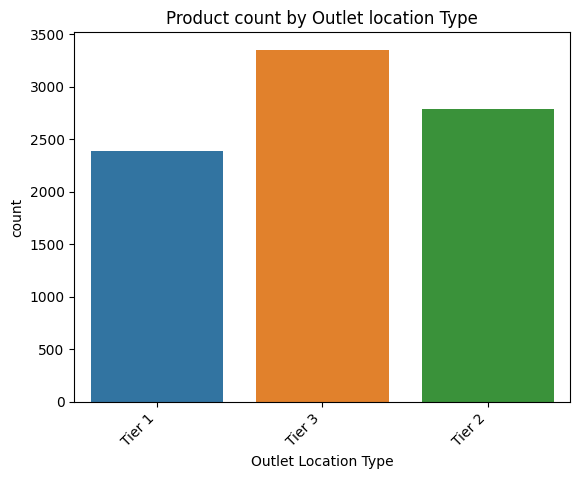

In [128]:
#Outlet location tier 3 has the highest product count, followed by
#tier 2. Tier 1 has the loweres product count.
ax=sns.countplot(data=df,x='Outlet Location Type')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Product count by Outlet location Type');

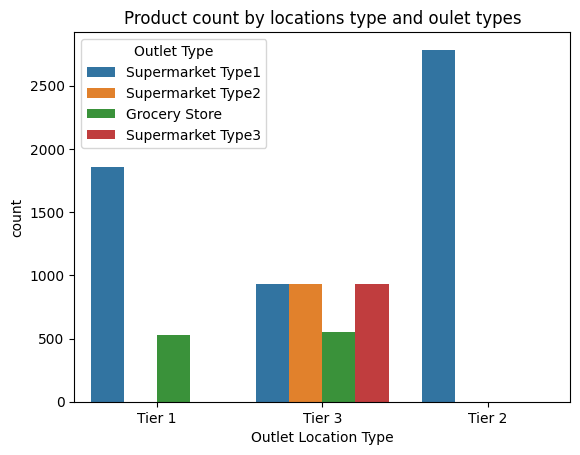

In [129]:
#From the countplot below, only tier 3 location has all 4 types of
#outlets, tier 2 location only has supermarket type 1.
ax=sns.countplot(data=df,x='Outlet Location Type',hue='Outlet Type')
ax.set_title('Product count by locations type and oulet types');

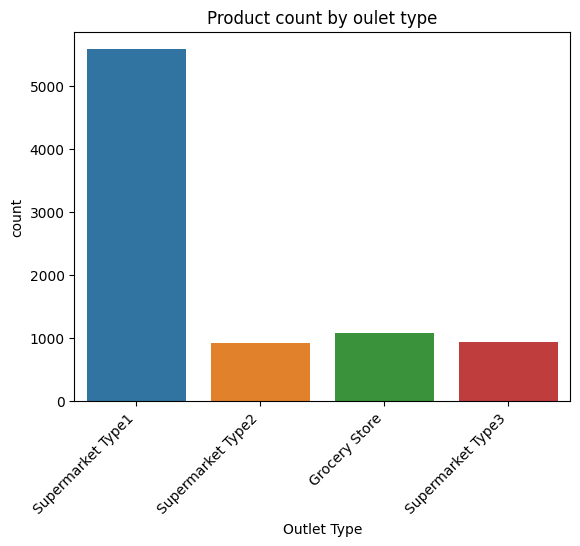

In [130]:
#Supermarket Type 1 has much higher product counts than the other
#3 types of stores.
ax=sns.countplot(data=df,x='Outlet Type')
ax.set_title('Product count by oulet type')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');

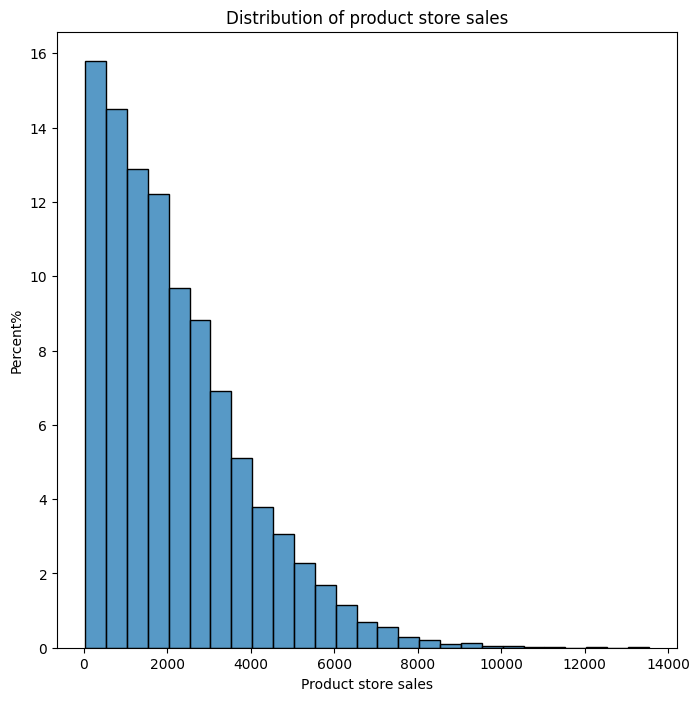

In [131]:
#3)Histograms to view the distributions of numerical features in your dataset.
##By looking at the histplot below, Product store sales between $0 to $500 has
##almost 16% of the total product count. Percentage of total product count
##decrease as product store sales increase.
fig,ax=plt.subplots(figsize=(8,8))
ax=sns.histplot(data=df,x='Product store sales',stat='percent',binwidth=500,ax=ax)
ax.set_title('Distribution of product store sales')
ax.set_xlabel('Product store sales')
ax.set_ylabel('Percent%');

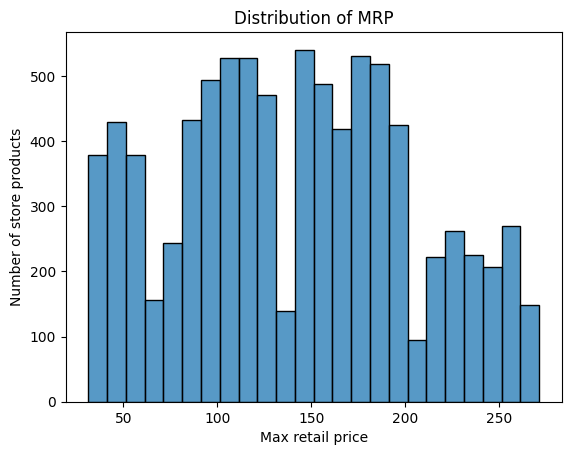

In [132]:
#This histplot below shows the distribution of Max retail price. It is
#hard to tell between which MRP range has the most product count since
#there are few price ranges are very close.
ax=sns.histplot(data=df,x='Max Retail Price',binwidth=10)
ax.set_title('Distribution of MRP')
ax.set_xlabel('Max retail price')
ax.set_ylabel('Number of store products');

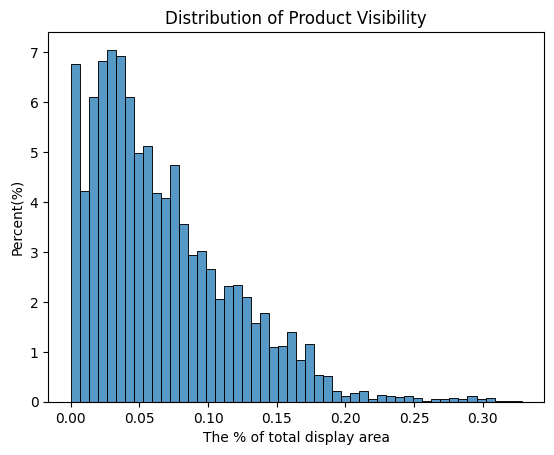

In [133]:
#From the graph below, product visibility of ~0.025-0.04 has the higest
#percentage of product counts. product visibility range from ~0 to 0.06
#has the majority of the product count.
ax=sns.histplot(data=df,x='The % of total display area',stat='percent')
ax.set_title('Distribution of Product Visibility')
ax.set_ylabel('Percent(%)');

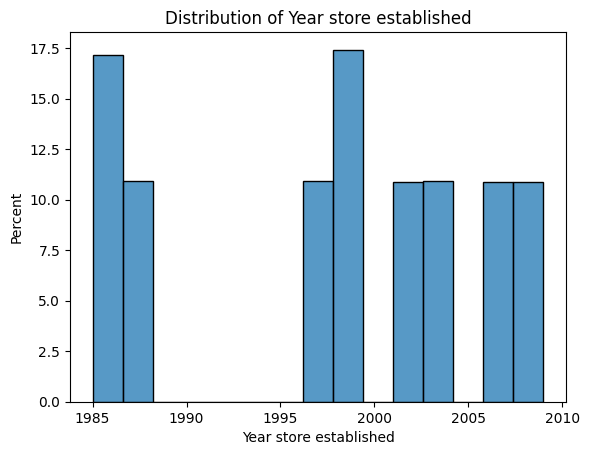

In [134]:
#Store established between 1985 to 1987, and 1998 to 2000 each has 17% of the total
#product count.Only about 20% of the product were sold at
#store established after 2005.
ax=sns.histplot(data=df,x='Year store established',bins='auto',stat='percent')
ax.set_title('Distribution of Year store established');


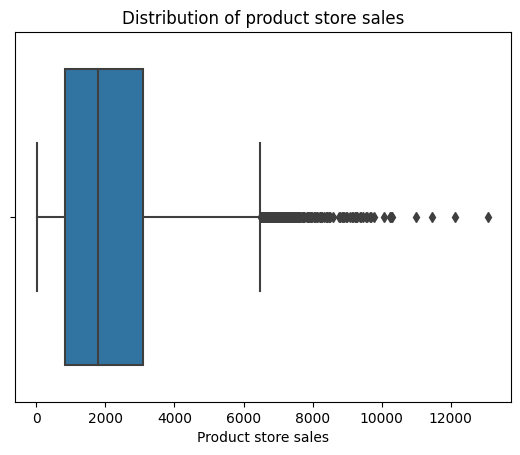

In [135]:
#4)#Boxplots to view statistical summaries of numerical features in your dataset.
##The distribution of the product store sales shows that 50% of the product
##sales are around $1000 to $3000 with the median being around $1900.
## 25% of product sales fall between $0 to $1000.Noticed there are
##outliers on the high side.
ax=sns.boxplot(data=df,x='Product store sales')
ax.set_title('Distribution of product store sales');

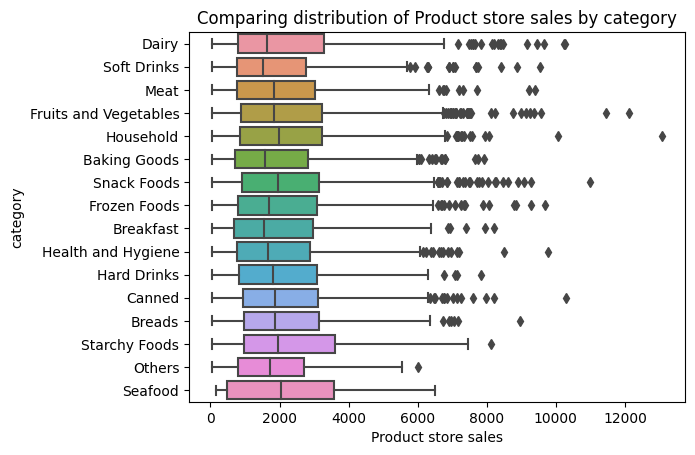

In [136]:
#Comparing distributions of store sales by categories.
ax=sns.boxplot(data=df,x='Product store sales',y='category')
ax.set_title('Comparing distribution of Product store sales by category');

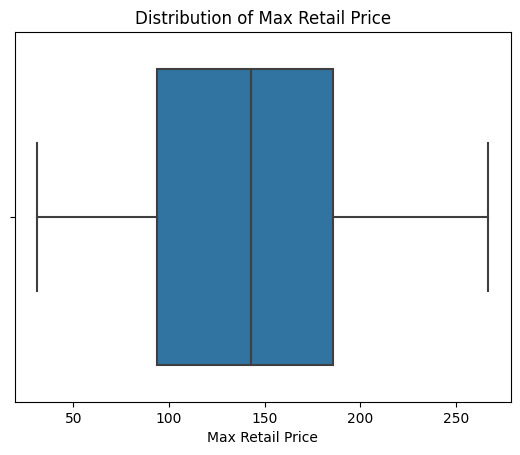

In [137]:
#50% of the product's MRPs are in the range between $90 to $180.
ax=sns.boxplot(data=df,x='Max Retail Price')
ax.set_title('Distribution of Max Retail Price');

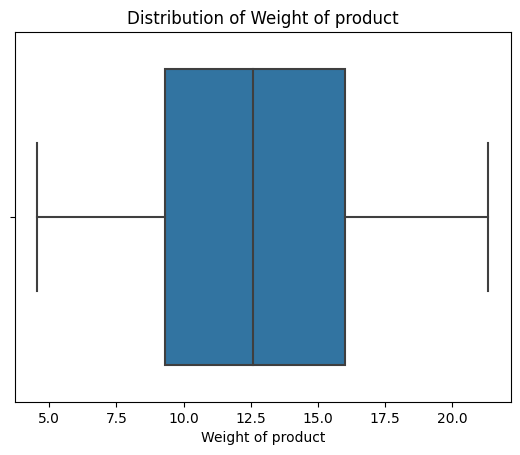

In [138]:
#Null values in 'weight of product' has been replaced by the median. This might
#affect the outcome of the result. 50% of the product has the weight betwwen
#9 to 16.
ax=sns.boxplot(data=df,x='Weight of product')
ax.set_title('Distribution of Weight of product');

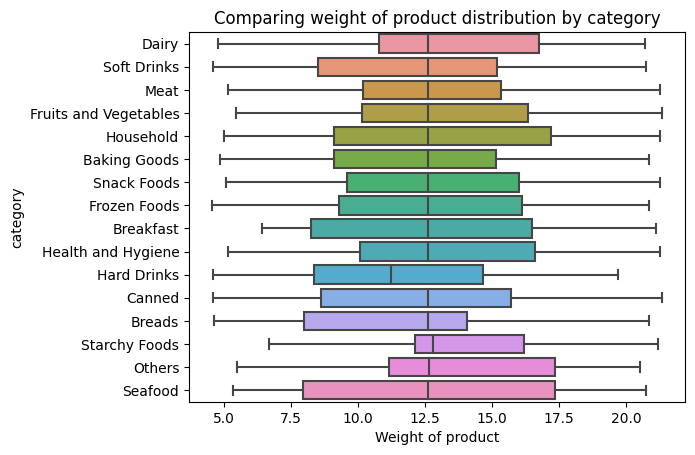

In [139]:
#Comparing distribution of product weights among categories.
ax=sns.boxplot(data=df,x='Weight of product',y='category')
ax.set_title('Comparing weight of product distribution by category');

## Feature Inspection